<a href="https://colab.research.google.com/github/Flavio-AzL/challenge-alura-store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


## *00. Explorações iniciais dos Datasets*

In [2]:
print(loja1.shape)
print(loja2.shape)
print(loja3.shape)
print(loja4.shape)

# Observado dif. na quantidade de linhas para Loja4


(2359, 12)
(2359, 12)
(2359, 12)
(2358, 12)


In [ ]:
print(loja1.columns)
print(loja2.columns)
print(loja3.columns)
print(loja4.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')
Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')
Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')
Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


#1. Análise do faturamento


In [3]:
# Organizando os dataframes para facilitar a visualzação com rótulos 'Loja x':
lojas = [loja1, loja2, loja3, loja4]
nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Análise de Faturamento de Vendas, por loja:
for loja, preco in zip(nomes, lojas):
  vendas = preco['Preço'].sum()
  print(f'{loja}: R$ {vendas:.2f}')


Loja 1: R$ 1534509.12
Loja 2: R$ 1488459.06
Loja 3: R$ 1464025.03
Loja 4: R$ 1384497.58


In [4]:
# Análise do valor de Fretes recebidos por loja:
for loja, frete in zip(nomes, lojas):
  fretes = frete['Frete'].sum()
  print(f'{loja}: R$ {fretes:.2f}')


Loja 1: R$ 81837.97
Loja 2: R$ 79314.16
Loja 3: R$ 78022.66
Loja 4: R$ 73755.88


In [5]:
import pandas as pd

# Adiciona coluna 'Loja'
for loja_df, nome in zip(lojas, nomes):
    loja_df['Loja'] = nome

# Junta tudo
todas_lojas = pd.concat(lojas, ignore_index=True)

# Extrai o ano da data
todas_lojas['Ano'] = pd.to_datetime(todas_lojas['Data da Compra'], dayfirst=True).dt.year

# Calcula colunas de faturamento
todas_lojas['Faturamento Sem Frete'] = todas_lojas['Preço']
todas_lojas['Faturamento Com Frete'] = todas_lojas['Preço'] + todas_lojas['Frete']

# Agrupa por Ano e Loja
comparativo = todas_lojas.groupby(['Ano', 'Loja'])[['Faturamento Sem Frete', 'Faturamento Com Frete']].sum().round(2).reset_index()

# Pivot para melhor leitura
pivot_sem_frete = comparativo.pivot(index='Ano', columns='Loja', values='Faturamento Sem Frete')
pivot_com_frete = comparativo.pivot(index='Ano', columns='Loja', values='Faturamento Com Frete')

# Adiciona totais por loja no final
pivot_sem_frete.loc['Total Loja'] = pivot_sem_frete.sum()
pivot_com_frete.loc['Total Loja'] = pivot_com_frete.sum()

print("🔹 Faturamento SEM frete (Preço apenas):")
print(pivot_sem_frete)

print("\n🔹 Faturamento COM frete (Receita total):")
print(pivot_com_frete)


🔹 Faturamento SEM frete (Preço apenas):
Loja            Loja 1      Loja 2      Loja 3      Loja 4
Ano                                                       
2020         491911.51   427288.25   428943.09   441129.52
2021         482829.91   468288.89   483938.91   463763.27
2022         422086.24   477635.56   467250.70   402961.23
2023         137681.46   115246.36    83892.33    76643.56
Total Loja  1534509.12  1488459.06  1464025.03  1384497.58

🔹 Faturamento COM frete (Receita total):
Loja            Loja 1      Loja 2      Loja 3      Loja 4
Ano                                                       
2020         518239.59   450178.65   451700.04   464501.99
2021         508456.33   493113.25   509786.25   488559.85
2022         444569.80   503095.81   492221.39   424502.28
2023         145081.37   121385.51    88340.01    80689.34
Total Loja  1616347.09  1567773.22  1542047.69  1458253.46


📈 Crescimento Percentual Ano a Ano (COM Frete):
Loja  Loja 1  Loja 2  Loja 3  Loja 4
Ano                                 
2020     NaN     NaN     NaN     NaN
2021   -1.89    9.54   12.86    5.18
2022  -12.56    2.02   -3.45  -13.11
2023  -67.37  -75.87  -82.05  -80.99


        Crescimento Médio (%) por Ano
Loja                                 
Loja 1                         -27.27
Loja 2                         -21.44
Loja 3                         -24.21
Loja 4                         -29.64




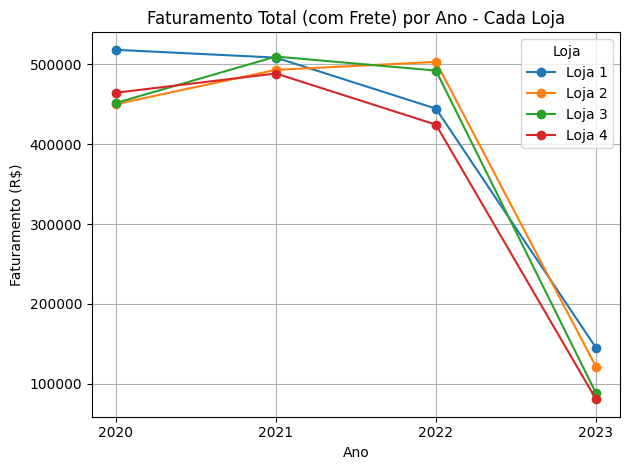

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove a linha 'Total Loja' para calcular crescimento apenas entre anos reais
pivot_com_frete_sem_total = pivot_com_frete.drop(index='Total Loja')

# Garante que o índice seja inteiro para ordenação correta
pivot_com_frete_sem_total.index = pivot_com_frete_sem_total.index.astype(int)

# Calcula a taxa de crescimento percentual ano a ano
print('📈 Crescimento Percentual Ano a Ano (COM Frete):')
crescimento_pct = pivot_com_frete_sem_total.pct_change().round(4) * 100
print(crescimento_pct)
print('\n')

# Calcula a média de crescimento por loja
media_crescimento = crescimento_pct.mean().round(2)
media_crescimento_df = pd.DataFrame(media_crescimento, columns=['Crescimento Médio (%) por Ano'])
print(media_crescimento_df)
print('\n')

# Gráfico de linha do faturamento com frete por ano
pivot_com_frete_sem_total.plot(marker='o')
plt.title('Faturamento Total (com Frete) por Ano - Cada Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Ano')
plt.xticks(pivot_com_frete_sem_total.index)
plt.grid(True)
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [7]:
pd.pivot_table(
    todas_lojas,
    values='Preço',
    index='Categoria do Produto',
    columns='Loja',
    aggfunc='sum',
    fill_value=0
).round(2)


Loja,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
brinquedos,23993.78,21262.21,25869.20,27015.67
eletrodomesticos,484913.36,464758.13,438984.89,377680.65
eletronicos,572659.23,547773.71,547699.92,545966.86
esporte e lazer,52387.55,46326.09,47456.10,44465.65
instrumentos musicais,121731.69,139987.03,103174.45,100136.50
livros,11713.92,13454.35,12664.70,12427.77
moveis,250178.11,235234.68,268095.56,256705.65
utilidades domesticas,16931.48,19662.86,20080.21,20098.83


# 3. Média de Avaliação das Lojas

In [8]:
avaliacoes = todas_lojas.groupby('Loja')['Avaliação da compra'].mean().sort_values()
avaliacoes


,Avaliação da compra
Loja,
Loja 1,3.976685
Loja 4,3.995759
Loja 2,4.037304
Loja 3,4.048326


# 4. Produtos Mais e Menos Vendidos

In [9]:
# Conta quantas vezes cada produto aparece por loja
produtos_por_loja = todas_lojas.groupby(['Loja', 'Produto']).size().reset_index(name='Frequência')

# Inicializa lista para armazenar os resultados
resultados = []

# Para cada loja, identifica o mais e o menos vendido
for loja, grupo in produtos_por_loja.groupby('Loja'):
    mais_vendido = grupo.sort_values(by='Frequência', ascending=False).iloc[0]
    menos_vendido = grupo.sort_values(by='Frequência', ascending=True).iloc[0]

    resultados.append({
        'Loja': loja,
        'Mais Vendido': mais_vendido['Produto'],
        'Frequência (Mais)': mais_vendido['Frequência'],
        'Menos Vendido': menos_vendido['Produto'],
        'Frequência (Menos)': menos_vendido['Frequência']
    })

# Cria DataFrame final
mais_e_menos_vendidos_df = pd.DataFrame(resultados)

# Exibe
print(mais_e_menos_vendidos_df)


     Loja              Mais Vendido  Frequência (Mais)      Menos Vendido  \
0  Loja 1             TV Led UHD 4K                 60       Celular ABXY   
1  Loja 2  Iniciando em programação                 65  Jogo de tabuleiro   
2  Loja 3             Kit banquetas                 57   Blocos de montar   
3  Loja 4                  Cama box                 62           Guitarra   

   Frequência (Menos)  
0                  33  
1                  32  
2                  35  
3                  33  


# 5. Frete Médio por Loja


In [10]:
# Calcula o frete médio por loja
frete_medio = todas_lojas.groupby('Loja')['Frete'].mean().round(2)

# Exibe o resultado
print('Frete Médio por Loja:')
print(frete_medio)


Frete Médio por Loja:
Loja
Loja 1    34.69
Loja 2    33.62
Loja 3    33.07
Loja 4    31.28
Name: Frete, dtype: float64


# **Nota Final Análise para Fechamento de Loja**

Após realizar uma análise detalhada dos dados de faturamento das quatro lojas, considerando diferentes aspectos (com e sem frete, crescimento percentual, categoria de produtos, avaliações dos clientes, e até mesmo os produtos mais e menos vendidos), chegamos às seguintes conclusões:

**Principais Fatores Avaliados:**
- Faturamento Total (Com e Sem Frete):
A Loja 4 apresenta o menor faturamento acumulado entre todas as lojas, tanto considerando o valor bruto (com frete) quanto o valor apenas de Produtos (sem frete). Podemos observar melhor esse desempenho com o gráfico abaixo:


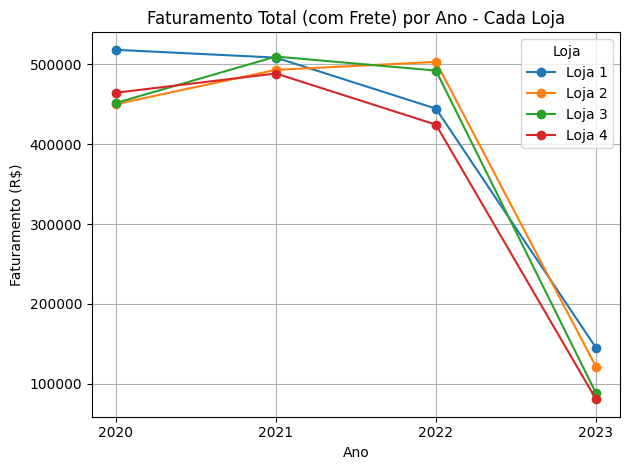

In [11]:
# Gráfico de linha do faturamento com frete por ano
pivot_com_frete_sem_total.plot(marker='o')
plt.title('Faturamento Total (com Frete) por Ano - Cada Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Ano')
plt.xticks(pivot_com_frete_sem_total.index)
plt.grid(True)
plt.tight_layout()
plt.show()

- Crescimento Percentual Ano a Ano:
A **Loja 4** foi uma das que mais sofreu **redução no faturamento**, com uma média de crescimento anual negativa de -29,64%, a pior entre todas as unidades.
Podemos observar melhor esses dados analisando o gráfico abaixo:


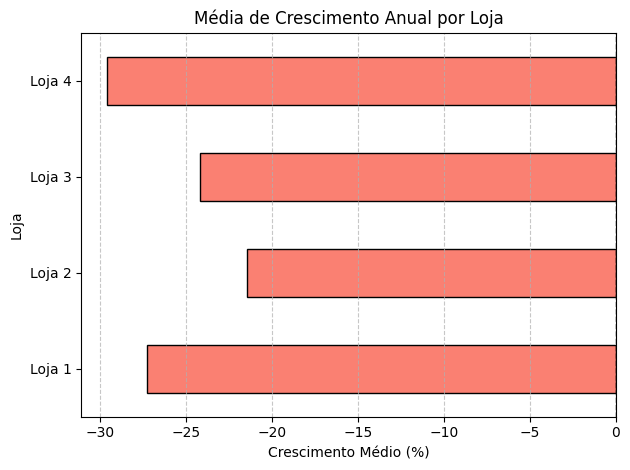

In [14]:
media_crescimento.plot(kind='barh', color='salmon', edgecolor='black')
plt.title('Média de Crescimento Anual por Loja')
plt.xlabel('Crescimento Médio (%)')
plt.ylabel('Loja')
plt.axvline(0, color='black', linewidth=1, linestyle='--')  # Linha de referência no zero
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



- Análise de Categoria de Produtos:
A Loja 4 mantém um desempenho inferior nas principais categorias de produtos de maior valor agregado (eletrodomésticos e eletrônicos), em comparação com as demais lojas. Isso pode ser melhor percebido com o grafico abaixo.
Repare que a expressividade de vendas da Loja 4, em comparação com as outras lojas, não atinge as categorias de produtos de maior expressividade.



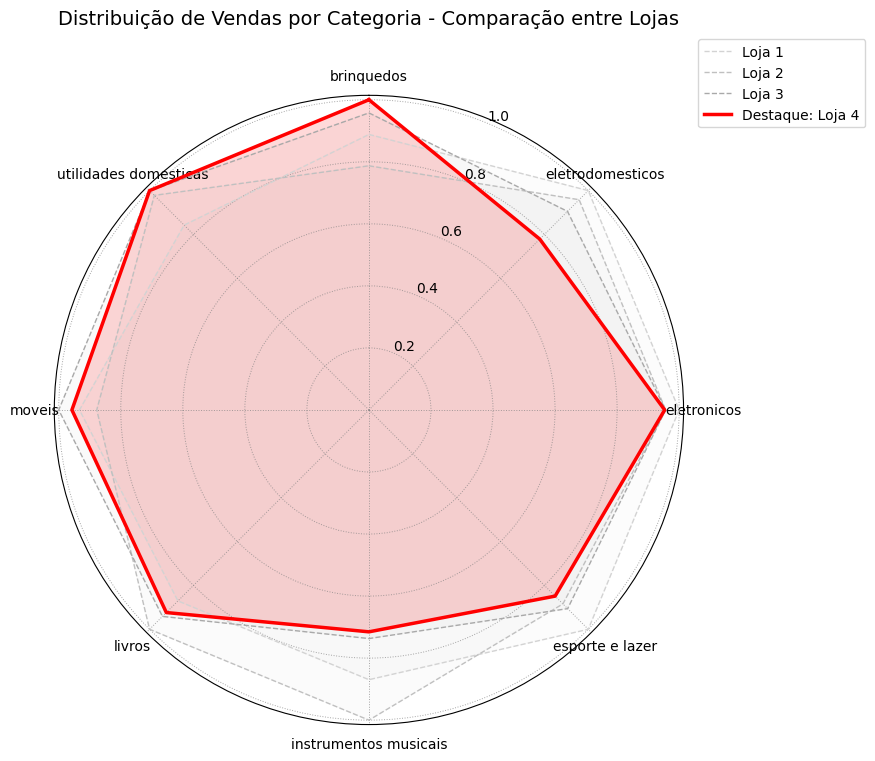

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dados de vendas por categoria
categorias = ['brinquedos', 'eletrodomesticos', 'eletronicos', 'esporte e lazer',
              'instrumentos musicais', 'livros', 'moveis', 'utilidades domesticas']

dados = {
    'Loja 1': [23993.78, 484913.36, 572659.23, 52387.55, 121731.69, 11713.92, 250178.11, 16931.48],
    'Loja 2': [21262.21, 464758.13, 547773.71, 46326.09, 139987.03, 13454.35, 235234.68, 19662.86],
    'Loja 3': [25869.20, 438984.89, 547699.92, 47456.10, 103174.45, 12664.70, 268095.56, 20080.21],
    'Loja 4': [27015.67, 377680.65, 545966.86, 44465.65, 100136.50, 12427.77, 256705.65, 20098.83]
}

df = pd.DataFrame(dados, index=categorias)

# Normalizar os dados (para escala comparável entre categorias)
df_normalizado = df.divide(df.max(axis=1), axis=0)

labels = categorias
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Fechar o gráfico

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

# Cores personalizadas
cores = {
    'Loja 1': 'lightgray',
    'Loja 2': 'silver',
    'Loja 3': 'darkgray',
    'Loja 4': 'red'  # Destaque
}

# Plotar cada loja
for loja in df_normalizado.columns:
    valores = df_normalizado[loja].tolist()
    valores += valores[:1]
    if loja == 'Loja 4':
        ax.plot(angles, valores, label='Destaque: ' + loja, color=cores[loja], linewidth=2.5)
        ax.fill(angles, valores, color=cores[loja], alpha=0.15)
    else:
        ax.plot(angles, valores, label=loja, color=cores[loja], linewidth=1, linestyle='--')
        ax.fill(angles, valores, color=cores[loja], alpha=0.05)

# Ajustes visuais
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)

# Título com espaçamento
plt.title('Distribuição de Vendas por Categoria - Comparação entre Lojas', y=1.1, fontsize=14)

# Melhorar a grid
ax.grid(color='gray', linestyle=':', linewidth=0.7, alpha=0.7)

# Legenda
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


- Produtos Mais e Menos Vendidos:
A variedade de produtos mais vendidos na Loja 4 indica um mix com menos força comercial. O produto mais vendido (Cama box) e o menos vendido (Guitarra) reforçam a **baixa diversificação de vendas expressivas**.

- Avaliação Média dos Clientes:
Apesar de ter a segunda melhor média de avaliação (3,99), *isso não compensou os baixos resultados em vendas e faturamento*.

- Frete Médio por Loja:
A Loja 4 tem o menor custo médio de frete (R$ 31,28), o que indica uma leve *vantagem logística, mas insuficiente para alterar o quadro geral*.

#**Conclusão Recomendada:**

Com base nos dados de faturamento, crescimento histórico, desempenho por categoria, mix de produtos vendidos e outras variáveis analisadas, a **Loja 4** se apresenta como a unidade com o **pior desempenho global**, sendo a candidata mais indicada para fechamento no atual cenário.

Essa decisão é suportada tanto pelos números de receita, quanto pelas tendências negativas de crescimento e venda de produtos de maior valor.